In [1]:
import numpy as np 
from numpy import power
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import linear_model
import os

In previous cases we worked with an input space X, where $X_D \in \mathbb{R} \quad \forall D$ and the target Y: $Y \in \mathbb{R} \quad D = 1$. However, how do we modify the model when we are working with a classification problems? Oftentimes, these models have a target $Y$ where: $Y \in \mathbb{N} \quad D \geqslant 1$. For these cases we use a logistic regression. 


The logistic function is of the form:
${\displaystyle p(Y = y | X = x|)={\frac {1}{1+\exp(\mathbb{-yf(x)})}}}$


The function ${\displaystyle \frac {1}{1+\exp(-t)}}$ is called the logistic function or the sigmoid function.
and looks as follows:

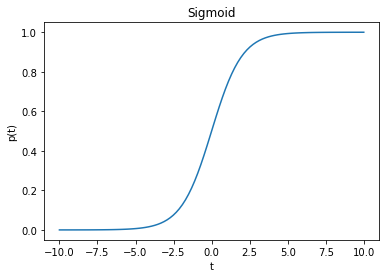

In [2]:
sigmoid = lambda t : 1 / (1 + np.exp(-t))
t = np.linspace(-10,10,100)
p = [sigmoid(t) for t in t]

fig, ax = plt.subplots();
ax.set_title("Sigmoid")
ax.set_xlabel("t")
ax.set_ylabel(r'p(t)')
ax.plot(t,p);

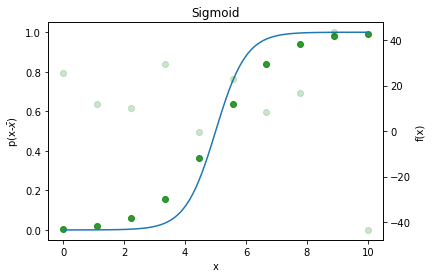

In [3]:

x = np.linspace(0,10,100)
y = [sigmoid(t) for t in t]

xTrain = np.linspace(0,10,10)
yTrain = np.array([np.random.normal(i, 20, 1)[0] for i in xTrain])


fig, ax = plt.subplots();
ax.set_title("Sigmoid")
ax.set_xlabel("x")
ax.set_ylabel(r'p(x-$\bar{x}$)')
ax.plot(x,y);
ax.scatter(x=xTrain,y=[sigmoid(t - np.mean(xTrain)) for t in xTrain], c="green", alpha=0.8);
ax2 = ax.twinx();
ax2.scatter(x=xTrain,y=yTrain, c="green", alpha=0.2);
ax2.set_ylabel(r'f(x)')

plt.show()

As shown above the Sigmoid funtion squashes the output space into a resticted domain between zero and one. Consequently, we can use the sigmoid function to transform the continous domain of Y into a continous domain between zero and one. Thereafter we can determine the weights by minimizing the loss function:   

${\displaystyle argmin_W L(X,Y,\mathbb{f(x)}) :=  y log(p) + (1-y)log(1-p) + \lambda\Omega(f)}$</br>
${\displaystyle p =\frac {\exp(\mathbb{f(x))} }{1+\exp(\mathbb{f(x)})}} $

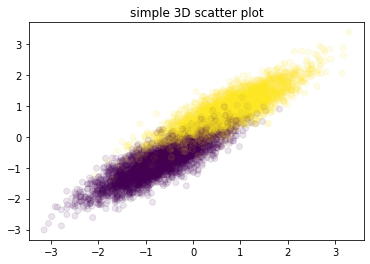

In [4]:
normalize = lambda df : (df-np.mean(df, axis=0))/np.std(df, axis=0)
transform = lambda y : 1 if y == '"Male"' else 0

X = np.genfromtxt('weight-height.csv', delimiter=',', dtype=float, skip_header=1, usecols=(1,2))
Y = np.genfromtxt('weight-height.csv', delimiter=',', dtype=str, skip_header=1, usecols=(0))
X = normalize(X)
Y = np.array(list(map(transform, Y)))[:, None]

# Define variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Creating plot
fig, ax = plt.subplots();
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.1);
ax.set_title("simple 3D scatter plot");

In [5]:
k = 2 + 1
phi = lambda x : np.hstack((np.full((x.shape[0],1), 1) ,x))

In [6]:
start = np.full((k, 1),0)
vY = y_train
mX = phi(X_train)

# cost function
def logit(mX, beta):
    return np.exp(mX @ beta[None].T)/(1.0 + np.exp(mX @ beta[None].T))

def logLikelihoodLogit(beta, mX, vY):
    return -(np.sum( vY*np.log(logit(mX, beta)) + (1-vY)*(np.log(1-logit(mX, beta)))))

def likelihoodScore(beta, mX, vY):   
    return mX.T @ (logit(mX, beta.T) - vY)

Result = minimize(fun = logLikelihoodLogit, 
                 x0 = start, 
                 args = (mX, vY),
                 method = 'TNC',
                 jac = likelihoodScore);
w = Result.x
print(Result)

     fun: 1409.6259543664269
     jac: array([[ 1.62408621e-04],
       [ 1.48659009e-06],
       [-1.07220810e-04]])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 40
     nit: 15
  status: 1
 success: True
       x: array([ 0.03043942, -2.00352658,  6.44741909])


In [7]:
model = linear_model.LogisticRegression(penalty='none', solver='lbfgs')
model.fit(X_train, y_train.ravel())
print(model.intercept_, model.coef_)

[0.03043917] [[-2.00352909  6.4474235 ]]


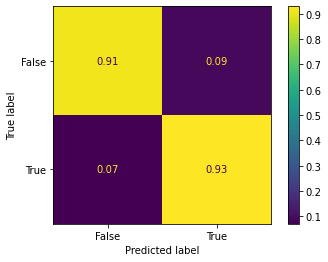

In [8]:
y_hat = np.array([logit(x,w) for x in phi(X_test)]) // 0.5
confusion_matrix = confusion_matrix(y_test, y_hat, normalize='true')
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]) 
cm_display.plot()
plt.show() 